In [1]:
import os
import json
import torch

os.chdir('../../')

/home/tsa87/anaconda3/envs/tacogfn/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
pocket2mol_res = torch.load('misc/benchmarking/pocket2mol_res.pt')
targetdiff_res = torch.load('misc/benchmarking/targetdiff_res.pt')

In [3]:
pharmaco_res_path = 'misc/evaluations/archive/20240117_alpha_default_evaluated.json'
with open(pharmaco_res_path) as f:
    pharmaco_res = json.load(f)

In [33]:
med_vina = {
    key: np.median(v['docking_scores']) for key, v in pharmaco_res.items()
}
sorted_med_vina = sorted(med_vina.items(), key=lambda x: x[1])

In [34]:
sort_key, sort_val = zip(*sorted_med_vina)

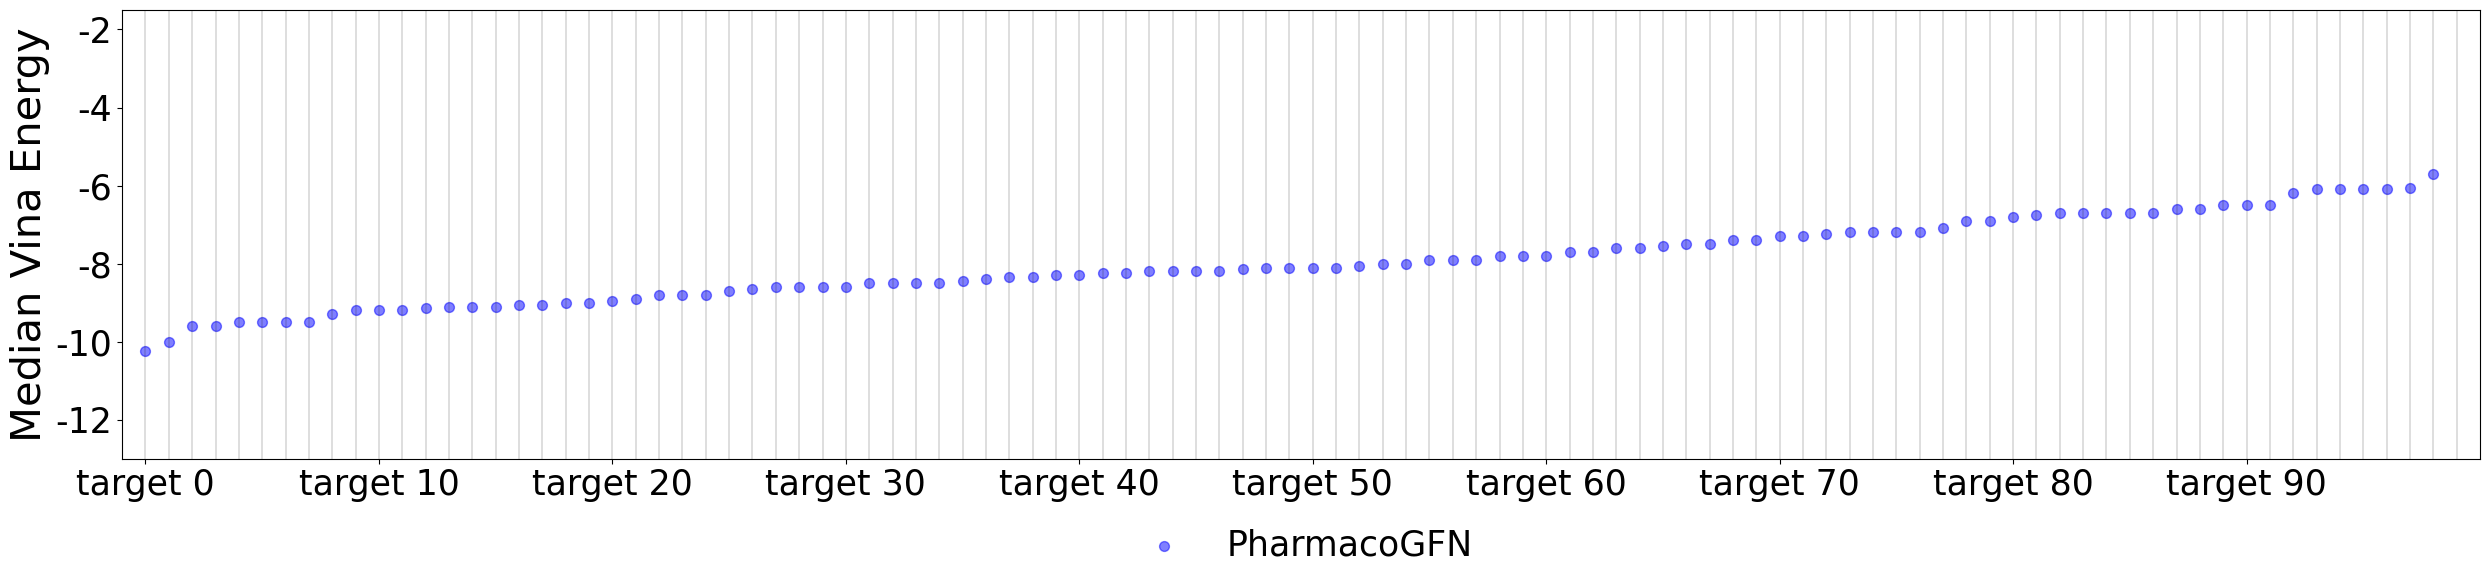

In [49]:
plt.figure(figsize=(25, 6), dpi=100)

plt.scatter(range(len(sort_val)), sort_val, s=50, c='b', alpha=0.5, label='PharmacoGFN')

plt.yticks(fontsize=16)
for i in range(100):
    plt.axvline(i, c='0.1', lw=0.2)
    
plt.xlim(-1, 100)
plt.ylim(-13, -1.5)
plt.yticks([-12, -10, -8, -6, -4, -2], [-12, -10, -8, -6, -4, -2], fontsize=25)
plt.ylabel('Median Vina Energy', fontsize=30)
plt.legend(fontsize=25, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.3), frameon=False)
plt.xticks(np.arange(0, 100, 10), [f'target {v}' for v in np.arange(0, 100, 10)], fontsize=25)

plt.tight_layout()
plt.savefig('figures/binding.png')
plt.show()

In [ ]:
plt.figure(figsize=(25, 6), dpi=100)

ax = plt.subplot(1, 1, 1)
ax.set_prop_cycle('color', plt.cm.Set1.colors)
n_data = len(our_vina)
fig1_idx = np.argsort(our_vina)
ALPHA = 0.75
POINT_SIZE = 128
plt.scatter(np.arange(n_data), ar_vina[fig1_idx], label=f'AR (lowest in {np.mean(best_vina_idx==1)*100:.0f}%)', alpha=ALPHA, s=POINT_SIZE * 0.75)
plt.scatter(np.arange(n_data), pocket2mol_vina[fig1_idx], label=f'Pocket2Mol (lowest in {np.mean(best_vina_idx==2)*100:.0f}%)', alpha=ALPHA, s=POINT_SIZE * 0.75)
plt.scatter(np.arange(n_data), our_vina[fig1_idx], label=f'{MODEL_NAME} (lowest in {np.mean(best_vina_idx==0)*100:.0f}%)', alpha=ALPHA, s=POINT_SIZE)

# plt.xticks([])
plt.yticks(fontsize=16)
for i in range(n_data):
    plt.axvline(i, c='0.1', lw=0.2)
plt.xlim(-1, 100)
plt.ylim(-13, -1.5)
# plt.yticks([-10, -8, -6, -4, -2], [-10, -8, -6, -4, '$\geq$-2'], fontsize=25)
plt.yticks([-12, -10, -8, -6, -4, -2], [-12, -10, -8, -6, -4, -2], fontsize=25)
plt.ylabel('Median Vina Energy', fontsize=30)
plt.legend(fontsize=25, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.3), frameon=False)
plt.xticks(np.arange(0, 100, 10), [f'target {v}' for v in np.arange(0, 100, 10)], fontsize=25)

plt.tight_layout()
# plt.savefig('output_figures/binding.png')
plt.show()